In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import calendar

In [3]:
import datetime as dt
import datetime
from flask import jsonify

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

#?? what is the func and inspect for
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine(f"sqlite:///Resources/hawaii.sqlite")

In [6]:
inspector = inspect(engine)

In [7]:
# dir(inspector)

In [8]:
tables = inspector.get_table_names()
tables

['measurement', 'station']

In [9]:
# help(inspector.get_columns)

In [10]:
for table in tables:
    print("\n")
    print('-' * 12)
    print(f"table '{table}' has the following columns:")
    print('-' * 12)
    for column in inspector.get_columns(table):
        print(f"name: {column['name']}   column type: {column['type']}, nullable:{column['nullable']}")
        



------------
table 'measurement' has the following columns:
------------
name: id   column type: INTEGER, nullable:False
name: station   column type: TEXT, nullable:True
name: date   column type: TEXT, nullable:True
name: prcp   column type: FLOAT, nullable:True
name: tobs   column type: FLOAT, nullable:True


------------
table 'station' has the following columns:
------------
name: id   column type: INTEGER, nullable:False
name: station   column type: TEXT, nullable:True
name: name   column type: TEXT, nullable:True
name: latitude   column type: FLOAT, nullable:True
name: longitude   column type: FLOAT, nullable:True
name: elevation   column type: FLOAT, nullable:True


In [11]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [12]:
# We can view all the classes that automap found
#--Get table names out
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
#--Create classes
Measurement = Base.classes['measurement']
Station = Base.classes['station']

In [14]:
dir(Measurement)
dir(Station)

['__abstract__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mapper__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__table__',
 '__weakref__',
 '_decl_class_registry',
 '_sa_class_manager',
 '_sa_decl_prepare',
 '_sa_raise_deferred_config',
 'classes',
 'elevation',
 'id',
 'latitude',
 'longitude',
 'metadata',
 'name',
 'prepare',
 'station']

In [15]:
# help(Measurement)

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [17]:
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Design a query to retrieve the last 12 months of precipitation data and plot the results
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()


** Note for study **
Functions to use with NaN : - 
.isna() : check for NaN, 
.fillna() : dosomthing with missisng value, 
.dropna() : drop null value

In [58]:
#--Loaded the query results into Pandas DataFrame
clean_prcp = pd.DataFrame(results)
clean_prcp['date'] = pd.to_datetime(clean_prcp['date'])

#--Clean data by replacing 0 into the null value
clean_prcp = clean_prcp.fillna(0)

#--Set indext to column['date']
clean_prcp = clean_prcp.set_index('date')


#--Sort dataframe by 'date'
clean_prcp.sort_values(by='date', ascending = False)
clean_prcp

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,0.00
2017-08-21,0.56


# Precipitation Bar Chart

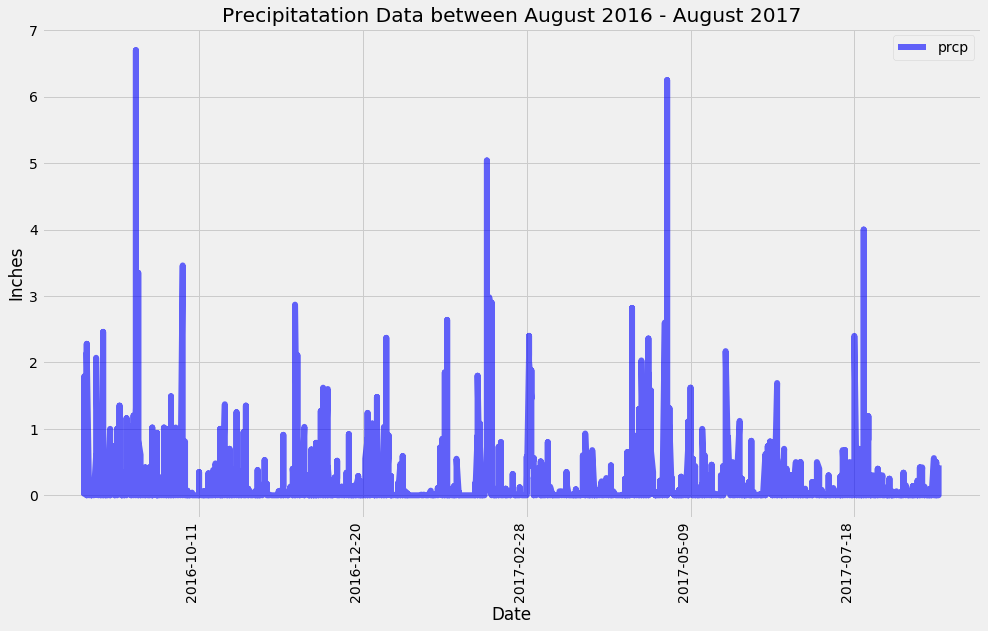

In [62]:
# x = clean_prcp.index
# y = clean_prcp["prcp"]
# # Format the date
# date_format = DateFormatter("%Y-%m-%d")
# ax = clean_prcp.plot(color="blue",alpha=0.6,figsize=(15,10), rot=90, linewidth=6)
# ax.xaxis.set_major_formatter(date_form)
# # Ensure a major tick using (interval=10)
# ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))


# fig = plt.figure(figsize = (20,9))
#--assigned x and y axis value
prcp_date = clean_prcp.index
prcp_data = clean_prcp['prcp']

#--template for date to show on x-axis
date_format = DateFormatter("%Y-%m-%d")
ax = clean_prcp.plot(color="blue",alpha=0.6,figsize=(15,10), rot=90, linewidth=6)
ax.xaxis.set_major_formatter(date_format)
# Ensure a major tick using (interval=10 weeks)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))

# plt.plot(prcp_date,prcp_data,color="blue",alpha=0.6,rot=90, linewidth=6)
# plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitatation Data between August 2016 - August 2017')
plt.show()

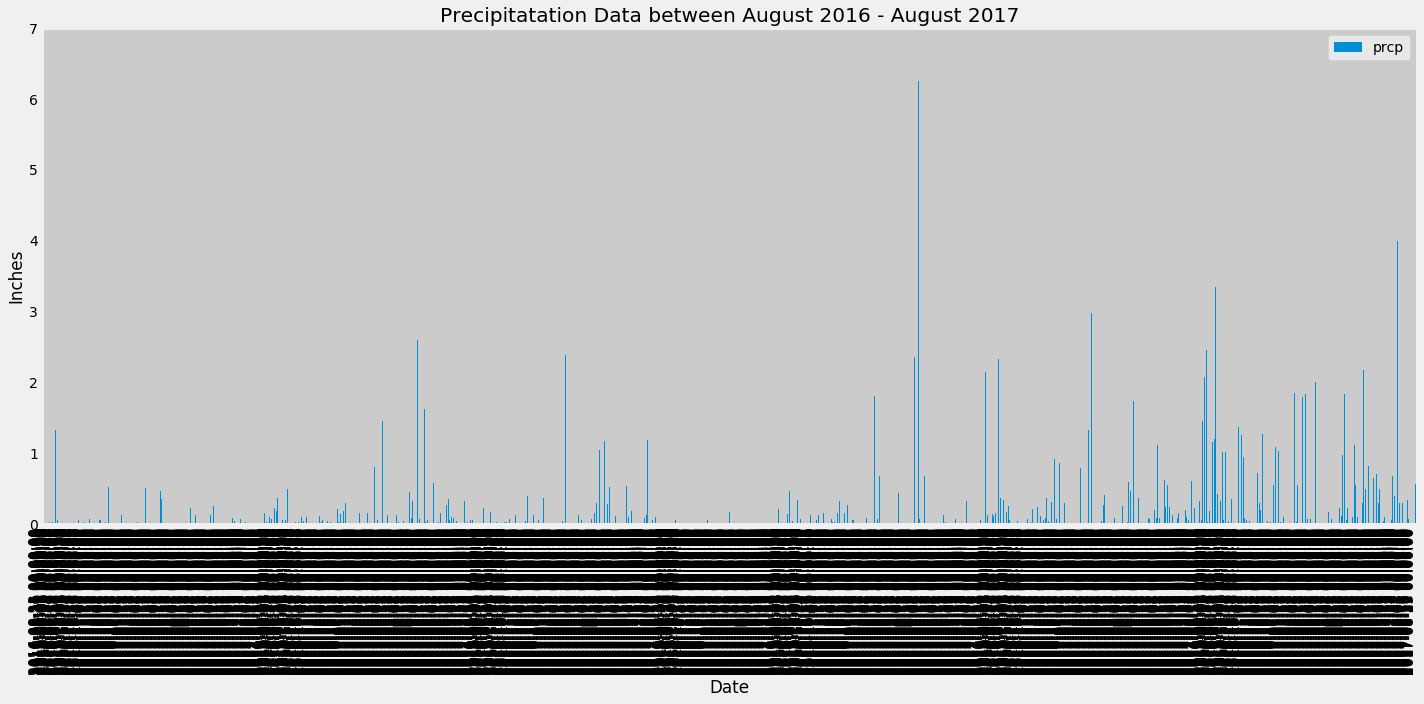

In [22]:
plt.style.use("fivethirtyeight")
clean_prcp.plot.bar(figsize=(20,10))
x_indexes = np.arange(len(clean_prcp.index))
plt.gcf().autofmt_xdate()
plt.ylim(0, 7)

# plt.xticks(ticks=x_indexes, labels=clean_prcp['date'])
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitatation Data between August 2016 - August 2017')
plt.grid(b=bool,which='major',axis='both')
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
clean_prcp.describe()

,prcp
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


### Station Analysis

In [24]:
# Design a query to show how many stations are available in this dataset?
stations_results = session.query(Station.id).count()
stations_results

9

### Find the most active stations 

In [25]:
# What are the most active stations? (i.e. what stations have the most rows)?
most_active = session.query(Measurement.station, func.count(Measurement.station))\
                .group_by(Measurement.station)\
                .order_by(func.count(Measurement.station).desc())

most_active.first()

('USC00519281', 2772)

In [26]:
# List the stations and the counts in descending order.
most_active_df = pd.DataFrame(data=most_active, columns=['Station','Count'])
most_active_df.head()

,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [27]:
most_active_station = most_active_df['Station'][0]
most_active_station

'USC00519281'

### Station USC00519281 has the highest number of observations

In [28]:
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
prev_year

datetime.date(2016, 8, 23)

In [29]:
# Perform a query to retrieve the data and precipitation scores
tobs_results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= prev_year)\
                .filter(Measurement.station == most_active_station).all()
# Data retrieved as a list
tobs_results

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [30]:
#--Loaded the query results into Pandas DataFrame
tobs_12mo = pd.DataFrame(tobs_results)
tobs_12mo = tobs_12mo.set_index('date')
tobs_12mo

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


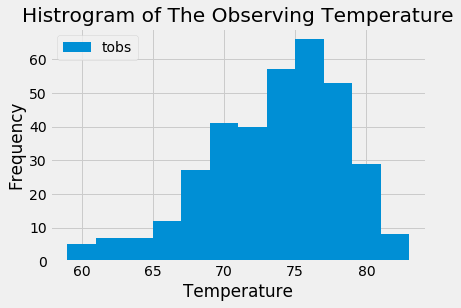

In [31]:
#Plot 1st method

plt.hist(tobs_12mo['tobs'],bins=12)
plt.title('Histrogram of The Observing Temperature')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(['tobs'], loc="upper left")

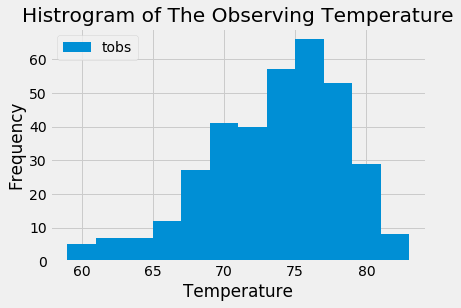

In [32]:
#Plot 2nd method

tobs_12mo.hist(bins=12)
plt.title('Histrogram of The Observing Temperature')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(['tobs'], loc="upper left")

## Bonus Challenge Assignment

In [33]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


### My Vacation date between '2017-03-15' and '2017-03-30'

In [34]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# My Vacation date between '2017-02-28' and '2017-03-05'
print(calc_temps('2017-02-28', '2017-03-05'))

[(64.0, 72.02777777777777, 78.0)]


Text(0.5, 1.0, 'Trip Average Temperature')

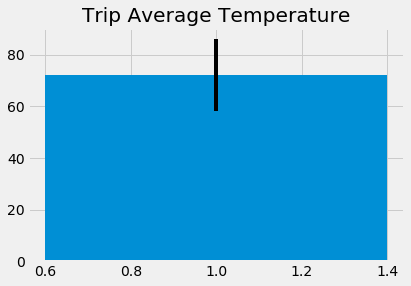

In [35]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

temp_bar = list(np.ravel(calc_temps('2017-02-28', '2017-03-05')))
plt.bar(1,temp_bar[1],yerr=temp_bar[2]-temp_bar[0])
plt.title('Trip Average Temperature')


### Print object from session into dictionary in python (Jeff Anderson)
### Using for study only

In [36]:
# idea base from: https://riptutorial.com/sqlalchemy/example/6614/converting-a-query-result-to-dict
def object_as_dict(obj):
    """
    This function takes in a Class instance (row ) from an ORM query and converts it to a dictionary
    """
    obj_count = 1
    try:
        obj_count = len(obj)
    except:
        pass
    if  obj_count == 1:
        base_dict = {c.key: getattr(obj, c.key)
            for c in inspect(obj).mapper.column_attrs}
        return base_dict
    else:
        cur_obj = obj[0]
        base_dict = {c.key: getattr(cur_obj, c.key) for c in inspect(cur_obj).mapper.column_attrs}
        for i in range(1, obj_count):
            cur_obj = obj[i]
            cur_dict = {c.key: getattr(cur_obj, c.key) for c in inspect(cur_obj).mapper.column_attrs}
            base_dict = {**base_dict, **cur_dict} 
        return base_dict

In [37]:
def query_to_list_of_dicts(cur_query):
    """
    From a query object return a list of dictionaries
    """
    return [object_as_dict(row) for row in cur_query]

In [38]:
total_rainfall = session.query(Measurement.station, 
                               Station.name,\
                               func.sum(Measurement.prcp),\
                               Station.latitude,\
                               Station.longitude,\
                               Station.elevation)\
                               .filter(Measurement.date >= '2016-08-23')\
                               .filter(Measurement.station == most_active_station)\
                               .group_by(Measurement.station)\
                               .order_by(func.sum(Measurement.prcp).desc()).all()
total_rainfall

[('USC00519281',
  'WAIKIKI 717.2, HI US',
  630.2699999999962,
  21.2716,
  -157.8168,
  3.0)]

In [39]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
## ??? list index out of range
## ??? Is this becuase station name has , in it?
total_rainfall = session.query(Measurement.station, 
                               Station.name,\
                               func.sum(Measurement.prcp),\
                               Station.latitude,\
                               Station.longitude,\
                               Station.elevation)\
                               .filter(Measurement.date >= '2016-08-23')\
                               .filter(Measurement.station == most_active_station)\
                               .group_by(Measurement.station)\
                               .order_by(func.sum(Measurement.prcp).desc()).all()
tt_rain_dict = {}
###
#Using when desparate
###
for r in total_rainfall:
    
    tt_rain_dict["station"] = total_rainfall[0][0]
    tt_rain_dict["s_name"] = total_rainfall[0][1]
    tt_rain_dict["sum_prcp"] = total_rainfall[0][2]
    tt_rain_dict["lat"] = total_rainfall[0][3]
    tt_rain_dict["lon"] = total_rainfall[0][4]
    tt_rain_dict["ele"] = total_rainfall[0][5]
    
tt_rain_dict

{'station': 'USC00519281',
 's_name': 'WAIKIKI 717.2, HI US',
 'sum_prcp': 630.2699999999962,
 'lat': 21.2716,
 'lon': -157.8168,
 'ele': 3.0}

### First Method : Using Jeff Function to take query to dictionary using function
### Using for study only

In [40]:
# Test Jeff functions : can only use for individual table without query?
measurment = query_to_list_of_dicts(session.query(Measurement))
measurment
# measurement_df = pd.DataFrame(measurment)
# measurement_df

[{'id': 1,
  'station': 'USC00519397',
  'date': '2010-01-01',
  'prcp': 0.08,
  'tobs': 65.0},
 {'id': 2,
  'station': 'USC00519397',
  'date': '2010-01-02',
  'prcp': 0.0,
  'tobs': 63.0},
 {'id': 3,
  'station': 'USC00519397',
  'date': '2010-01-03',
  'prcp': 0.0,
  'tobs': 74.0},
 {'id': 4,
  'station': 'USC00519397',
  'date': '2010-01-04',
  'prcp': 0.0,
  'tobs': 76.0},
 {'id': 5,
  'station': 'USC00519397',
  'date': '2010-01-06',
  'prcp': None,
  'tobs': 73.0},
 {'id': 6,
  'station': 'USC00519397',
  'date': '2010-01-07',
  'prcp': 0.06,
  'tobs': 70.0},
 {'id': 7,
  'station': 'USC00519397',
  'date': '2010-01-08',
  'prcp': 0.0,
  'tobs': 64.0},
 {'id': 8,
  'station': 'USC00519397',
  'date': '2010-01-09',
  'prcp': 0.0,
  'tobs': 68.0},
 {'id': 9,
  'station': 'USC00519397',
  'date': '2010-01-10',
  'prcp': 0.0,
  'tobs': 73.0},
 {'id': 10,
  'station': 'USC00519397',
  'date': '2010-01-11',
  'prcp': 0.01,
  'tobs': 64.0},
 {'id': 11,
  'station': 'USC00519397',
  'da

In [41]:
# Use real_sql function vs jeff function
#??? which one has more overhead cost? 
#??? between using read_sql to process in python?

conn = engine.connect()
rainfall_read_sql = pd.read_sql('select m.station, s.name,\
                                sum(m.prcp) as sum_prcp, \
                                s.latitude, s.longitude, s.elevation\
                                from measurement m \
                                join station s \
                                on m.station = s.station \
                                where m.date >= "2017-08-23"\
                                group by m.station\
                                order by sum_prcp DESC', conn)
print(rainfall_read_sql.shape)
rainfall_read_sql.head()



(4, 6)


,station,name,sum_prcp,latitude,longitude,elevation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",0.45,21.33310,-157.80250,152.4
1,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.08,21.33556,-157.71139,19.5
2,USC00519397,"WAIKIKI 717.2, HI US",0.00,21.27160,-157.81680,3.0
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.00,21.52130,-157.83740,7.0


# Create a query that will calculate the daily normals 

In [42]:
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [43]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date

normals = []

vac_dates = pd.date_range('2017-03-15','2017-03-31',freq='D')
vac_dates_for = vac_dates.strftime("%m-%d")

for vac_date in vac_dates_for:
    normals.append(*daily_normals(vac_date))

normals

[(58.0, 68.54716981132076, 76.0),
 (60.0, 69.70370370370371, 78.0),
 (57.0, 68.54, 75.0),
 (57.0, 67.7843137254902, 76.0),
 (60.0, 69.1, 75.0),
 (62.0, 70.11764705882354, 80.0),
 (60.0, 71.07692307692308, 77.0),
 (65.0, 71.75471698113208, 77.0),
 (63.0, 70.79629629629629, 78.0),
 (62.0, 71.5, 77.0),
 (63.0, 71.5, 78.0),
 (64.0, 71.38, 80.0),
 (63.0, 71.53846153846153, 80.0),
 (59.0, 71.51785714285714, 82.0),
 (58.0, 71.35714285714286, 77.0),
 (62.0, 72.17543859649123, 79.0),
 (61.0, 71.875, 79.0)]

In [44]:
vac_dates

DatetimeIndex(['2017-03-15', '2017-03-16', '2017-03-17', '2017-03-18',
               '2017-03-19', '2017-03-20', '2017-03-21', '2017-03-22',
               '2017-03-23', '2017-03-24', '2017-03-25', '2017-03-26',
               '2017-03-27', '2017-03-28', '2017-03-29', '2017-03-30',
               '2017-03-31'],
              dtype='datetime64[ns]', freq='D')

In [45]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

normals_df = pd.DataFrame(normals, columns=['Min','Avg',"Max"])

normals_df['date'] = vac_dates
normals_df.set_index(['date'], inplace=True)
print(normals_df.shape)
normals_df.head(16)


(17, 3)


,Min,Avg,Max
date,,,
2017-03-15,58.0,68.547170,76.0
2017-03-16,60.0,69.703704,78.0
2017-03-17,57.0,68.540000,75.0
2017-03-18,57.0,67.784314,76.0
2017-03-19,60.0,69.100000,75.0
2017-03-20,62.0,70.117647,80.0
2017-03-21,60.0,71.076923,77.0
2017-03-22,65.0,71.754717,77.0
2017-03-23,63.0,70.796296,78.0


In [46]:
# Import this for mpl_dates.DateFormatter()
from matplotlib import dates as mpl_dates

# Plot Temperature (Mininum, Average, Maximum) during selected vacation period

Text(0, 0.5, 'Temperature')

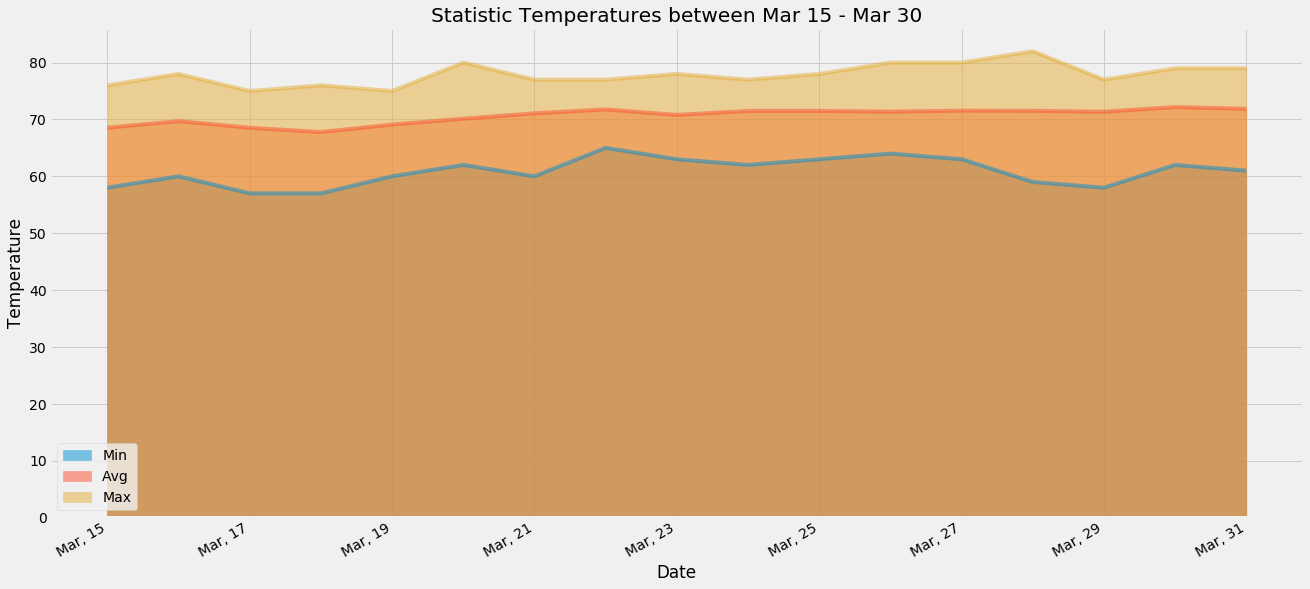

In [47]:
# Plot the daily normals as an area plot with `stacked=False`

# plt.rcParams['figure.figsize'] = (20,20)
normals_df.plot.area(figsize=(20,10),stacked=False, x_compat = True)

#-- gcf() is get current figure : Using to slanted date in x-axis
# plt.gcf().autofmt_xdate()

#-- change date format to be Mmm, dd,YYYY
date_format = mpl_dates.DateFormatter('%b, %d')
#-- .gca() is get current axis
plt.gca().xaxis.set_major_formatter(date_format)
#-- gcf() is get current figure
# plt.gcf().autofmt_xdate()

plt.title('Statistic Temperatures between Mar 15 - Mar 30')
plt.xlabel("Date")
plt.ylabel("Temperature")

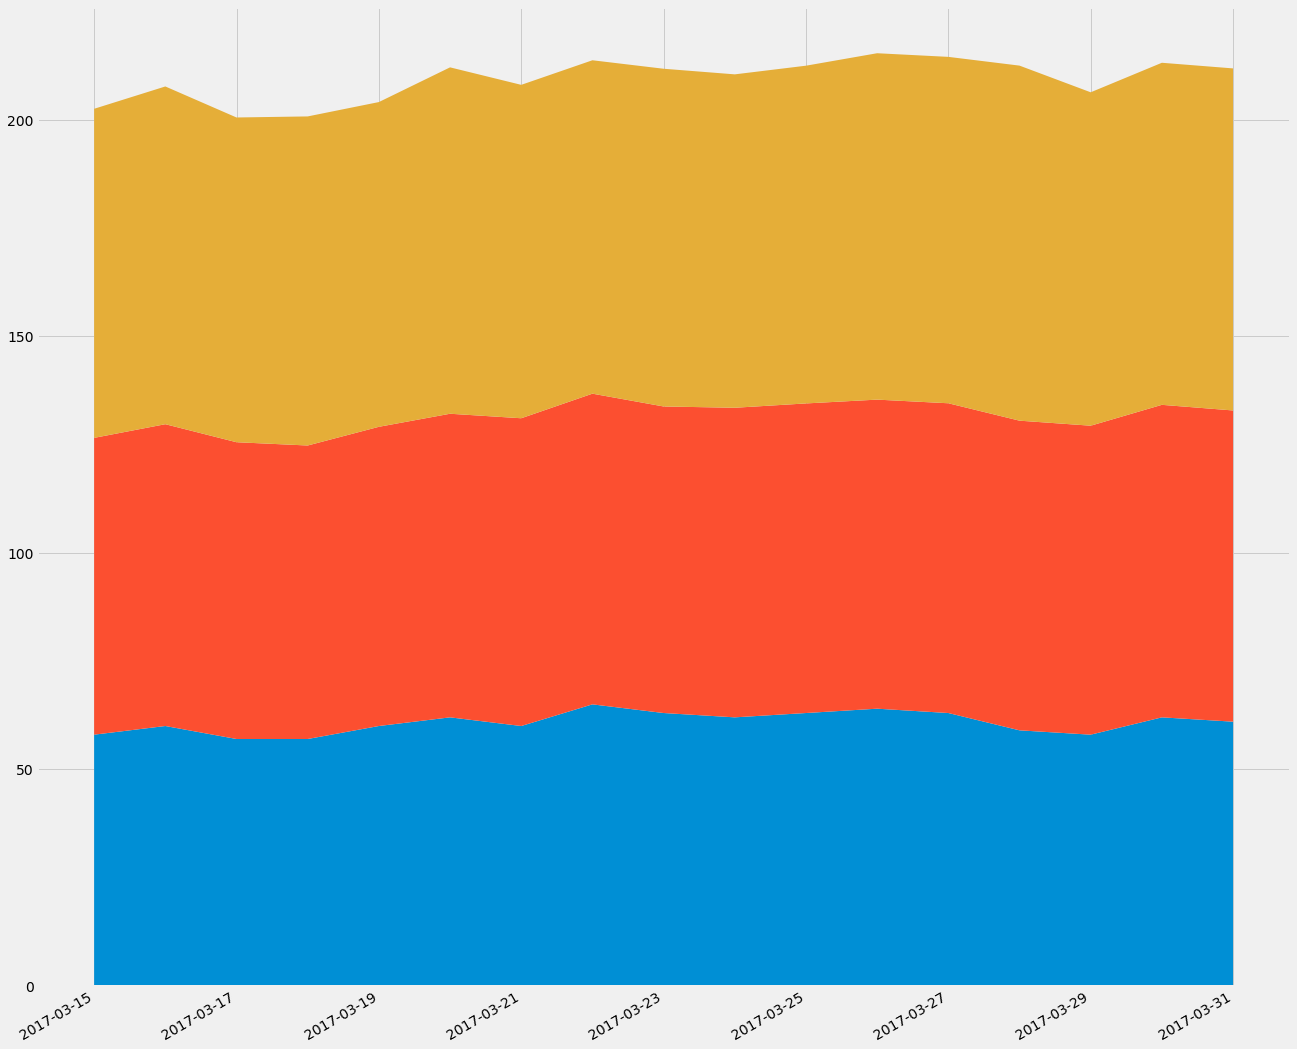

In [48]:
fig = plt.figure(figsize = (20,20))
x = pd.date_range('2017-03-15','2017-03-31',freq='D')
y = [normals_df.Min,normals_df.Avg,normals_df.Max]
plt.stackplot(x,y, labels=['Min','Avg','Max'])
plt.gcf().autofmt_xdate()
plt.show()

In [49]:
measurment = query_to_list_of_dicts(session.query(Measurement))
measurment_df = pd.DataFrame(measurment)
measurment_df.dtypes

id           int64
station     object
date        object
prcp       float64
tobs       float64
dtype: object

In [50]:
measurment_df.date = pd.to_datetime(measurment_df.date, infer_datetime_format = True)

In [51]:
measurment_df.dtypes
measurment_df.set_index(['date'], inplace = True)
measurment_df

,id,station,prcp,tobs
date,,,,
2010-01-01,1,USC00519397,0.08,65.0
2010-01-02,2,USC00519397,0.00,63.0
2010-01-03,3,USC00519397,0.00,74.0
2010-01-04,4,USC00519397,0.00,76.0
2010-01-06,5,USC00519397,NaN,73.0
...,...,...,...,...
2017-08-19,19546,USC00516128,0.09,71.0
2017-08-20,19547,USC00516128,NaN,78.0
2017-08-21,19548,USC00516128,0.56,76.0


In [52]:
june_avg_temp = measurment_df.loc[measurment_df.index.month == 6]
june_avg_temp.mean()

id      9752.647647
prcp       0.136360
tobs      74.944118
dtype: float64

In [53]:
dec_avg_temp = measurment_df.loc[measurment_df.index.month == 12]
dec_avg_temp.mean()

id      9816.710613
prcp       0.216819
tobs      71.041529
dtype: float64

In [54]:
from scipy import stats

In [55]:
stats.ttest_ind(june_avg_temp.tobs,dec_avg_temp.tobs)

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)